# 1. Generating Synthetic Dataset

In [1]:
import random
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from random import randint

data1 = np.random.normal(-1000, 10, size=(1000,3))  #FOR CLASS 0
data2 = np.random.normal(1000, 10, size=(1000,3))  #FOR CLASS 1

n,m = data1.shape
label1 = np.zeros((n,1))  #LABEL OF CLASS 0
label2 = np.ones((n,1))   #LABEL OF CLASS 1

data1 = np.hstack((data1,label1))
data2 = np.hstack((data2,label2))

print("Data 1 is: \n" , data1,"\n")
print("Data 2 is: \n" , data2)

Data 1 is: 
 [[-1005.07605679 -1001.05913178  -990.65216912     0.        ]
 [ -995.3309669   -982.39665497  -994.41109451     0.        ]
 [ -992.57214979  -981.13920261  -997.64120013     0.        ]
 ...
 [-1001.93710004  -988.80415074 -1003.88446475     0.        ]
 [-1001.15879039 -1015.73701856 -1026.97305522     0.        ]
 [-1001.72880536 -1000.76253368 -1017.26488889     0.        ]] 

Data 2 is: 
 [[9.91610339e+02 9.99988696e+02 9.78606660e+02 1.00000000e+00]
 [9.99359252e+02 1.01594801e+03 9.98593189e+02 1.00000000e+00]
 [9.93621182e+02 9.92500709e+02 9.79368973e+02 1.00000000e+00]
 ...
 [9.93535268e+02 1.00022410e+03 1.00464518e+03 1.00000000e+00]
 [1.00826503e+03 9.91238623e+02 9.89561432e+02 1.00000000e+00]
 [9.95043626e+02 9.63603950e+02 9.82939373e+02 1.00000000e+00]]


# 2. Viewing the Dataset

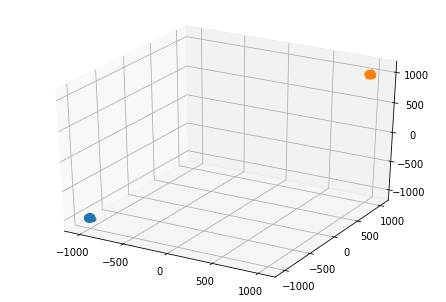

In [2]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(data1[:,0],data1[:,1],data1[:,2])
ax.scatter(data2[:,0],data2[:,1],data2[:,2])
pyplot.show()

data = np.vstack((data1,data2))
np.random.shuffle(data)

# 3. Splitting into training and validation sets

In [3]:
training_inputs = data[0:1600]
test_inputs = data[1600:2000]

print("Training Data is: \n" , training_inputs,"\n")
print("Testing Data is: \n" , test_inputs)

Training Data is: 
 [[ 9.96982769e+02  1.00177699e+03  9.85768836e+02  1.00000000e+00]
 [-1.00689733e+03 -1.00784494e+03 -1.00788944e+03  0.00000000e+00]
 [ 1.01710576e+03  1.00717697e+03  1.01093919e+03  1.00000000e+00]
 ...
 [-1.00597724e+03 -1.00602540e+03 -1.01363436e+03  0.00000000e+00]
 [ 1.00623291e+03  1.00253087e+03  1.00876889e+03  1.00000000e+00]
 [ 1.00424438e+03  1.00278717e+03  1.01329517e+03  1.00000000e+00]] 

Testing Data is: 
 [[-1.00805856e+03 -1.00247478e+03 -9.95504220e+02  0.00000000e+00]
 [ 1.01066910e+03  1.01218098e+03  9.89177158e+02  1.00000000e+00]
 [ 1.00457614e+03  1.00671779e+03  9.77655417e+02  1.00000000e+00]
 ...
 [ 9.97831296e+02  1.00307443e+03  9.95116324e+02  1.00000000e+00]
 [ 1.00300386e+03  9.99207519e+02  9.94131257e+02  1.00000000e+00]
 [ 9.94955750e+02  9.94656857e+02  1.00475602e+03  1.00000000e+00]]


# 4. Implemention of Perceptron

In [4]:
import numpy as np
import random
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import randint

class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.001):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0
        return activation

    def train(self, training_inputs, labels, test_inputs):
        misArray = []
        test_error = []
        for i in range(self.threshold):
            misclassified = 0
            tmisclassified = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
                if label-prediction != 0:
                    misclassified = misclassified + 1
            misArray.append(misclassified)
            for tinputs, tlabel in zip(test_inputs[:, [0,1,2]], test_inputs[:,3]):
                result = self.predict(tinputs)
                if tlabel - result !=0:
                    tmisclassified = tmisclassified + 1
            test_error.append(tmisclassified)

        #for i in test_error:
        #    print(i)
        # Data for plotting error rate curve
        t = misArray
        s = np.arange(0,100,1)
        fig, ax = plt.subplots()
        ax.plot(s, t)
        ax.set(xlabel='No of Epochs', ylabel='Error Rate',
        title='Error Rate as a function of epochs')
        ax.grid()
        plt.show()

        t = test_error
        s = np.arange(0,100,1)
        fig, ax = plt.subplots()
        ax.plot(s, t)
        ax.set(xlabel='No of Epochs', ylabel='Error Rate',
        title='Test Error Rate as a function of epochs')
        ax.grid()
        plt.show()
        
        return self.weights
        

# 5. Training the Perceptron and Plotting graphs


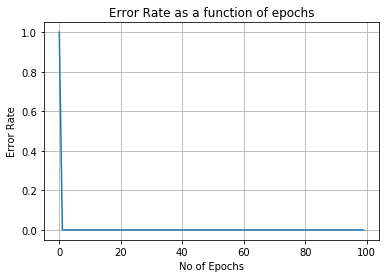

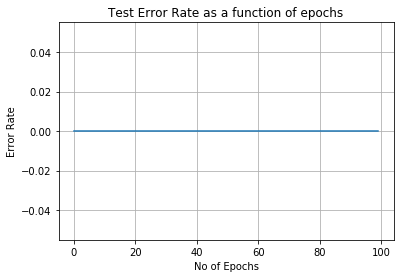

In [5]:
perceptron = Perceptron(3)
weights = perceptron.train(training_inputs[:, [0,1,2]], training_inputs[:,3],test_inputs)

# 6. Visualizing the separating hyperplane

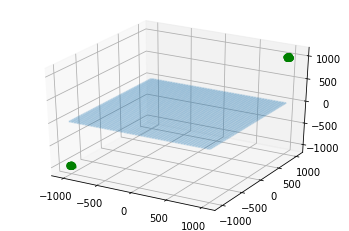

In [6]:

if (weights is not None):
            fig = plt.figure()
            gx = fig.add_subplot(111,projection='3d')
            # draw training line
            u = len(weights)
            aa, bb, cc = -weights[u-2]/weights[u-1], -weights[u-3]/weights[u-1], -weights[u-4]/weights[u-1]
            normal = np.array([training_inputs[1,0],training_inputs[1,1],training_inputs[1,2]])
            #print(normal)
            point = np.array([aa, bb, cc])   
            b = point.ravel()
            dd = -b.dot(normal)
            xx, yy = np.meshgrid(range(-1000,1000), range(-1000,1000))
            zz = (-normal[0] * xx - normal[1] * yy - dd) * 1.0 / normal[-1]
            zz = zz / zz.max()
            gx.scatter(training_inputs[:,0],training_inputs[:,1],training_inputs[:,2],color='green')
            gx.plot_wireframe(xx, yy, zz, alpha=0.2)
            plt.show()

# 7. Failure to converge

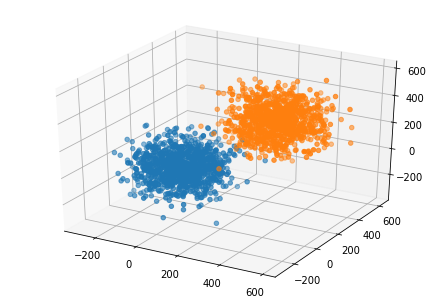

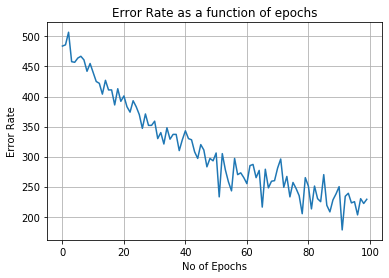

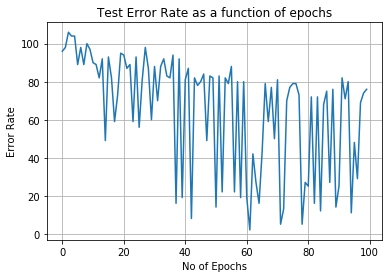

array([-21.933     ,   0.33497446,   0.21759538,   0.25965316])

In [7]:
data1 = np.random.normal(10, 100, size=(1000,3))  #FOR CLASS 0
data2 = np.random.normal(300, 100, size=(1000,3))  #FOR CLASS 1

n,m = data1.shape
label1 = np.zeros((n,1))  #LABEL OF CLASS 0
label2 = np.ones((n,1))   #LABEL OF CLASS 1

data1 = np.hstack((data1,label1))
data2 = np.hstack((data2,label2))

fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(data1[:,0],data1[:,1],data1[:,2])
ax.scatter(data2[:,0],data2[:,1],data2[:,2])
pyplot.show()

data = np.vstack((data1,data2))
np.random.shuffle(data)

training_inputs = data[0:1600]
test_inputs = data[1600:2000]


perceptron = Perceptron(3)
perceptron.train(training_inputs[:, [0,1,2]], training_inputs[:,3],test_inputs)


Since the points belonging to two seperate classes are no longer linearly seperable it becomes difficult to find a ideal perceptron which classifies all points even after completion of all epochs. The error rate still has a decline with increase in the epoch number.


**8. We now try to add another class to the feature vector.Data now has feature vectors consisting of 3 classes (0,1,2).**

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
class multiclassPerceptron(object):

    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.001):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.classes = [0.0, 1.0, 2.0]
        self.weight_vectors = {c: np.array([0.0 for _ in range(no_of_inputs + 1)]) for c in self.classes}

    def train(self, training_inputs, labels):
        n,m = training_inputs.shape
        bias = np.ones((n,1))
        training_inputs = np.hstack((training_inputs,bias))
        for i in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                arg_max, predicted_class = 0, self.classes[0]

                # Multi-Class Decision Rule:
                for c in self.classes:
                    current_activation = np.dot(inputs, self.weight_vectors[c])
                    if current_activation >= arg_max:
                        arg_max, predicted_class = current_activation, c
                # Update Rule:
                if not (label == predicted_class):
                    self.weight_vectors[label] += inputs
                    self.weight_vectors[predicted_class] -= inputs

        fig = plt.figure()
        gx = fig.add_subplot(111,projection='3d')
        for i in range(3):
            if (self.weight_vectors[i] is not None):
                # draw training line
                u = len(self.weight_vectors[i])
                aa, bb, cc = -self.weight_vectors[i][u-2]/self.weight_vectors[i][u-1], -self.weight_vectors[i][u-3]/self.weight_vectors[i][u-1], -self.weight_vectors[i][u-4]/self.weight_vectors[i][u-1]
                normal = np.array([training_inputs[1,0],training_inputs[1,1],training_inputs[1,2]])
                #print(normal)
                point = np.array([aa, bb, cc])
                b = point.ravel()
                dd = -b.dot(normal)
                xx, yy = np.meshgrid(range(-1000,1000), range(-1000,1000))
                zz = (-normal[0] * xx - normal[1] * yy - dd) * 1.0 / normal[-1]
                zz = zz / zz.max()
                gx.scatter(training_inputs[:,0],training_inputs[:,1],training_inputs[:,2],color='green')
                gx.plot_surface(xx, yy, zz)

        plt.show()

    def predict(self, input):
        input = np.hstack((input,1))
        arg_max, predicted_class = 0, self.classes[0]
        for c in self.classes:
            current_activation = np.dot(input, self.weight_vectors[c])
            if current_activation >= arg_max:
                arg_max, predicted_class = current_activation, c

        return predicted_class

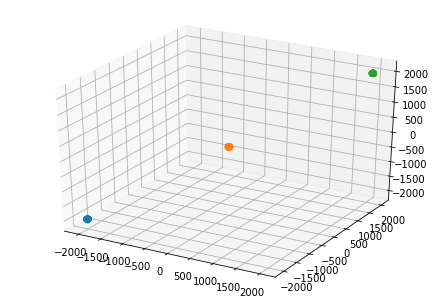

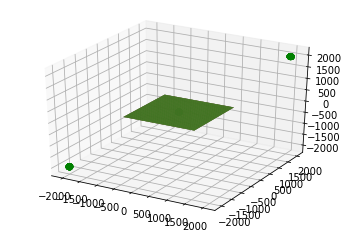

Precision 100.0 %


In [11]:
data1 = np.random.normal(-2000, 10, size=(1000,3))  #FOR CLASS 0
data2 = np.random.normal(0, 10, size=(1000,3))  #FOR CLASS 1
data3 = np.random.normal(2000, 10, size=(1000,3))  #FOR CLASS 2

n,m = data1.shape
label1 = np.zeros((n,1))  #LABEL OF CLASS 0
label2 = np.ones((n,1))   #LABEL OF CLASS 1
label3 = np.ones((n,1))   #LABEL OF CLASS 2

label3 = label3 * 2

data1 = np.hstack((data1,label1))
data2 = np.hstack((data2,label2))
data3 = np.hstack((data3,label3))

fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(data1[:,0],data1[:,1],data1[:,2])
ax.scatter(data2[:,0],data2[:,1],data2[:,2])
ax.scatter(data3[:,0],data3[:,1],data3[:,2])
pyplot.show()

data = np.vstack((data1,data2,data3))
np.random.shuffle(data)

training_inputs = data[0:2400]
test_inputs = data[2400:3000]

perceptron = multiclassPerceptron(3)
perceptron.train(training_inputs[:, [0,1,2]], training_inputs[:,3])

counter = 0
for inputs,labels in zip(test_inputs[:, [0,1,2]], test_inputs[:,3]):
    predicted = perceptron.predict(inputs)
    if predicted - labels == 0:
        counter += 1
    else:
        print("ACTUAL:",labels,"  Predicted:", predicted)


print("Precision",(counter/600)*100,"%")
